In [232]:
import os
import sys
sys.path.append('C:\\Users\\dhruv\\Anaconda3\\envs\\testPanorama\\Lib\\site-packages')
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
from imutils import paths
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
import random
import pickle
import csv
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import scipy
from sklearn.cluster import KMeans
from PIL import Image
from skimage.morphology import disk, opening
from pylab import *

**Edge Detection**

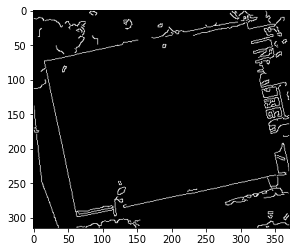

In [233]:
# F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\planShape\\images\\cam_sideview.png
img = cv2.imread('F:\\IIIT-H Work\\Datasets\\SGA21_roofOptimization-main\\SGA21_roofOptimization-main\\RoofGraphDataset\\dt_roof_image\\BJ39_500_099052_0036.jpg', 1)


gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
median = np.median(img)
sigma = 0.33
lower = int(max(0, (1.0 - sigma) * median))
upper = int(min(255, (1.0 + sigma) * median))

edges = cv2.Canny(blurred, lower, upper)
plt.imshow(edges)
plt.show()

**Hough Transform**

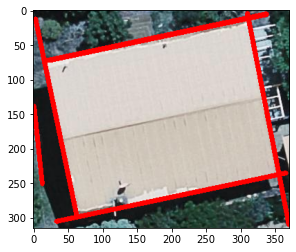

In [234]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 70, maxLineGap=250)
imgCopy1 = np.copy(img)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(imgCopy1, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
# lines = cv2.HoughLines(edges, 1, np.pi/180, 50)
# print(lines)
# for line in lines:
#     rho,theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 10000*(-b))
#     y1 = int(y0 + 10000*(a))
#     x2 = int(x0 - 10000*(-b))
#     y2 = int(y0 - 10000*(a))
#     cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)

plt.imshow(imgCopy1)
plt.show()

**Finding Contours**

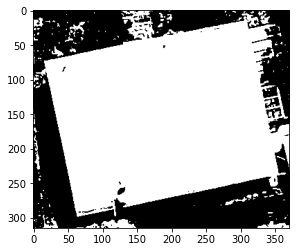

cnt: (979, 1, 2)
maxContours (979, 1, 2)


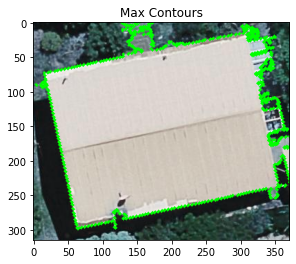

4


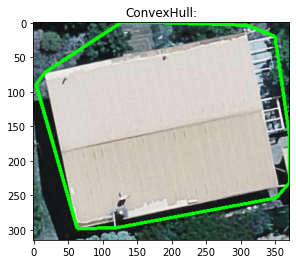

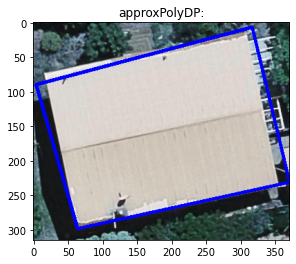

In [235]:
ret, thresh = cv2.threshold(gray, 50, 220, 0)
ret, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# find the main island (biggest area)
cnt = contours[0]
max_area = cv2.contourArea(cnt)

for cont in contours:
    if cv2.contourArea(cont) > max_area:
        cnt = cont
        max_area = cv2.contourArea(cont)
print('cnt:', cnt.shape)
        
        
maxContour = max(contours, key = cv2.contourArea)
print('maxContours', maxContour.shape)

imgCopy2 = np.copy(img)
cv2.drawContours(imgCopy2, cnt, -1, (0,255,0), 3)
plt.title('Max Contours')
plt.imshow(imgCopy2)
plt.show()

imgCopy3 = np.copy(img)
imgCopy4 = np.copy(img)

# for contour in maxContour:
#     perimeter = cv2.arcLength(contour, True)
#     approximatedShape = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
# #     print(approximatedShape)
#     print(len(approximatedShape))
#     convexHull = cv2.convexHull(contour)
#     cv2.drawContours(imgCopy3, [convexHull], -1, (255, 0, 0), 2)
#     cv2.drawContours(imgCopy4, [approximatedShape], -1, (0, 0, 255), 3)

# define main island contour approx. and hull
epsilon = 0.05*cv2.arcLength(cnt,True)
approximatedShape = cv2.approxPolyDP(cnt,epsilon,True)

print(len(approximatedShape))
convexHull = cv2.convexHull(cnt)

cv2.drawContours(imgCopy3, [convexHull], -1, (0, 255, 0), 3)
cv2.drawContours(imgCopy4, [approximatedShape], -1, (0, 0, 255), 3)

# Display the final convex hull image
plt.title('ConvexHull:')
plt.imshow(imgCopy3)
plt.show()

plt.title('approxPolyDP:')
plt.imshow(imgCopy4)
plt.show()

# Experimented Algorithms
**1.) Active Contours \
2.) Hough Transform + Polygon Approximation \
3.) Contour Approximation**

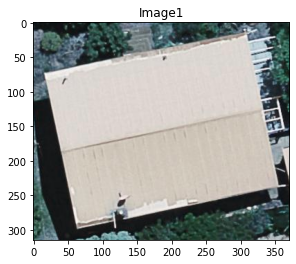

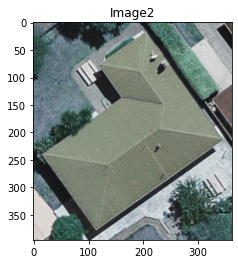

In [236]:
# 28.539901_77.205472.png
path1 = 'F:\\IIIT-H Work\\Datasets\\SGA21_roofOptimization-main\\SGA21_roofOptimization-main\\RoofGraphDataset\\dt_roof_image\\BJ39_500_099052_0036.jpg'
path2 = 'F:\\IIIT-H Work\\Datasets\\SGA21_roofOptimization-main\\SGA21_roofOptimization-main\\RoofGraphDataset\\dt_roof_image\\BJ39_500_100049_0008.jpg'
img = cv2.imread(path1)
img2 = cv2.imread(path2)

plt.title('Image1')
plt.imshow(img)
plt.show()

plt.title('Image2')
plt.imshow(img2)
plt.show()

In [237]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged


def equalize(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

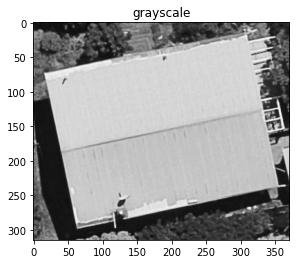

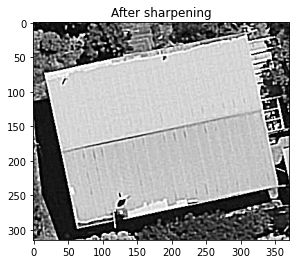

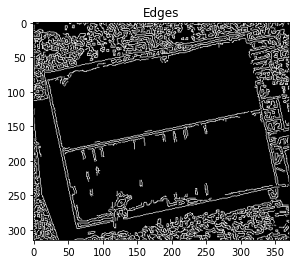

In [238]:
# imm = equalize(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.title('grayscale')
plt.imshow(gray, cmap='gray')

##Edge preservation and Noise reduction
blur = cv2.bilateralFilter(gray, 5, 75, 75)
kernel_sharp = np.array((
         [-2, -2, -2],
         [-2, 17, -2],
         [-2, -2, -2]), dtype='int')
sharpened_img = cv2.filter2D(blur, -1, kernel_sharp)
plt.figure()
plt.title('After sharpening')
plt.imshow(sharpened_img, cmap='gray')
canny = auto_canny(sharpened_img)
plt.figure()
plt.title('Edges')
plt.imshow(canny, cmap='gray')
plt.show()

## 1. Active Contours Algorithm

<ipython-input-239-8faad9d0bba1>:27: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),


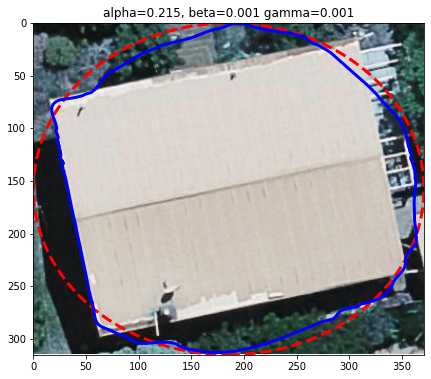

<ipython-input-239-8faad9d0bba1>:46: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),


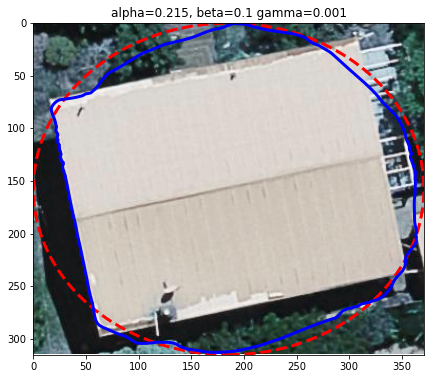

<ipython-input-239-8faad9d0bba1>:63: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),


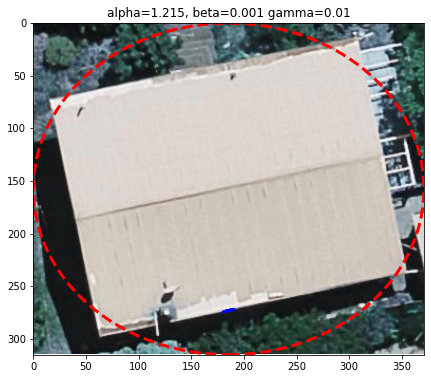

<ipython-input-239-8faad9d0bba1>:79: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),


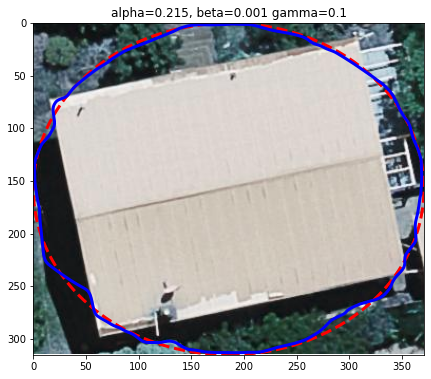

In [239]:
# Bilate filtered image. Sharpened image helps to give a better edge approximation.
# img = imread('bilate.png')
# img = rgb2gray(img)

# s = np.linspace(0, 2*np.pi, 1000)
# x = 83 + 100*np.cos(s)
# y = 33 + 100*np.sin(s)
# init = np.array([x, y]).T
# print (init)
# '''
# alpha Higher values make snake contract faster
# beta Highervalue make snake smoother
# Gamma Timestepping parameter
# '''
# snake = active_contour(sharpened_img, init, alpha=-1, beta=7, gamma=0.001, max_iterations=500)



##
s = np.linspace(0, 2*np.pi, 1000)
r = (img.shape[1]/2) + (img.shape[1]/2)*np.sin(s)
c = (img.shape[0]/2) + (img.shape[0]/2)*np.cos(s)
# r = np.linspace(0, img.shape[1], 1000)
# c = np.linspace(0, img.shape[0], 1000)
init = np.array([r, c]).T

snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
                       init, alpha=0.215, beta=0.001, gamma=0.001)
# snake = active_contour(sharpened_img, init, alpha=4.115, beta=0.111, gamma=0.001, max_iterations=500)

##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_title('alpha=0.215, beta=0.001 gamma=0.001')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()



snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
                       init, alpha=0.215, beta=0.1, gamma=0.001)

##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_title('alpha=0.215, beta=0.1 gamma=0.001')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()


snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
                       init, alpha=1.215, beta=0.001, gamma=0.01)
##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_title('alpha=1.215, beta=0.001 gamma=0.01')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()


snake = active_contour(gaussian(sharpened_img, 3, preserve_range=False),
                       init, alpha=0.215, beta=0.001, gamma=0.1)
##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_title('alpha=0.215, beta=0.001 gamma=0.1')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
# plt.imshow(img, cmap='gray')
plt.show()

**NOTE: Here, the Active Contour algorithm -> overly dependent on alpha, beta, gamma to get the desired output shape(in Blue). Moreover, Search Space/Region of interest is required.**

**Conclusion:** <br>
-> It is dependent on 3 hyperparameters to approximate the shape. \
-> Also the ROI(Region of INterest) needs to be specified which might not work for our use-case(Considering the fact that whole frame would contain the ROI)

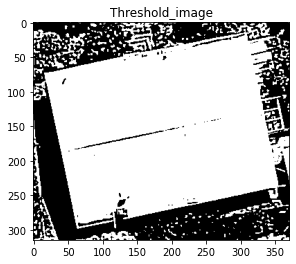

In [240]:
thresh = cv2.threshold(sharpened_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.figure()
plt.title('Threshold_image')
plt.imshow(thresh, cmap='gray')
plt.show()

## 2. Hough Transform and Polygon approximation Algorithm

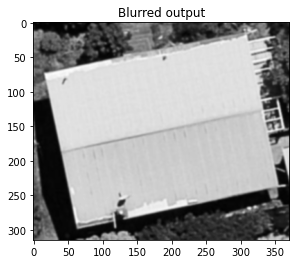

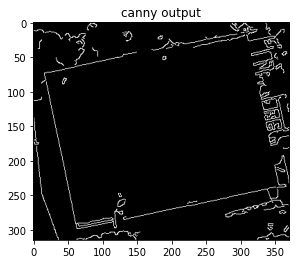

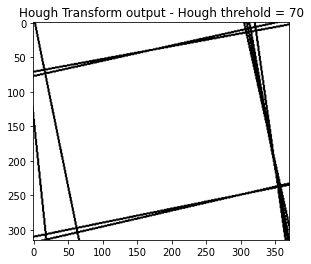

C:\Users\dhruv\Anaconda3\envs\droneiiitHCloneWithCVContrib\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dhruv\Anaconda3\envs\droneiiitHCloneWithCVContrib\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


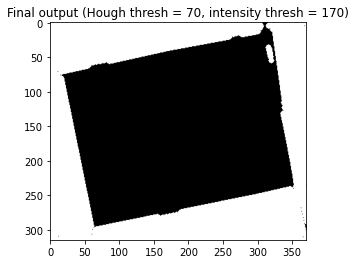

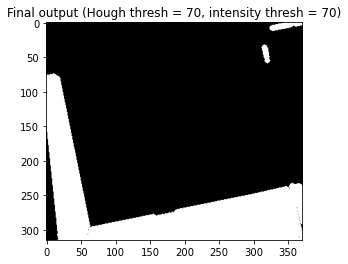

C:\Users\dhruv\Anaconda3\envs\droneiiitHCloneWithCVContrib\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dhruv\Anaconda3\envs\droneiiitHCloneWithCVContrib\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


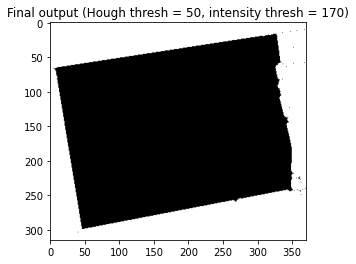

In [241]:
rows, cols, _ = img.shape
white_img = cv2.bitwise_not(np.zeros(img.shape, np.uint8))
white_polygon = cv2.bitwise_not(np.zeros(img.shape, np.uint8))
white_gray = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)
white_polygon_copy = cv2.bitwise_not(np.zeros(img.shape, np.uint8))


## Blurring 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.title('Blurred output')
plt.imshow(blurred)
plt.show()

canny = auto_canny(blurred)
plt.title('canny output')
plt.imshow(canny)
plt.show()
# dilated = cv2.dilate(canny, np.ones((3,3), dtype=np.uint8))
# plt.title('dilated output')
# plt.imshow(dilated)
# plt.show()

lines = cv2.HoughLines(canny, 1, np.pi / 180, 70)
lines = np.reshape(lines, (lines.shape[0], lines.shape[2]))

kmeans = KMeans(n_clusters=10).fit(lines)

for line in kmeans.cluster_centers_:
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(white_gray, (x1, y1), (x2, y2), 0, 2)

contours = cv2.findContours(white_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

plt.title('Hough Transform output - Hough threhold = 70')
plt.imshow(white_gray)
plt.show()

######################################## CASE1 #######################################################
for cnt in contours:
    cv2.drawContours(white_polygon, cnt, 0, 0, -1)
    man = []
    intense = []
    for col in range(cols):
        for row in range(rows):
            if cv2.pointPolygonTest(cnt, (col, row), False) == 1:
                man.append((row, col))
    for k in man:
        intense.append(img[k])
    intensity = mean(intense)
#     print (intensity)
    if intensity > 170:
        cv2.drawContours(white_polygon, [cnt], 0, 0, -1)

white_gray1 = cv2.cvtColor(white_polygon, cv2.COLOR_BGR2GRAY)
opened = opening(white_gray1, selem=disk(4))
plt.title('Final output (Hough thresh = 70, intensity thresh = 170)')
plt.imshow(opened, cmap='gray')
plt.show()


######################################### CASE2 #########################################################
for cnt in contours:
    cv2.drawContours(white_polygon_copy, cnt, 0, 0, -1)
    man = []
    intense = []
    for col in range(cols):
        for row in range(rows):
            if cv2.pointPolygonTest(cnt, (col, row), False) == 1:
                man.append((row, col))
    for k in man:
        intense.append(img[k])
    intensity = mean(intense)
#     print (intensity)
    if intensity > 70:
        cv2.drawContours(white_polygon_copy, [cnt], 0, 0, -1)
        
white_gray1_copy = cv2.cvtColor(white_polygon_copy, cv2.COLOR_BGR2GRAY)
opened_copy = opening(white_gray1_copy, selem=disk(4))
plt.title('Final output (Hough thresh = 70, intensity thresh = 70)')
plt.imshow(opened_copy, cmap='gray')
plt.show()


####################################### CASE3(Hough Transform Param change) ###########################################################
white_img = cv2.bitwise_not(np.zeros(img.shape, np.uint8))
white_polygon = cv2.bitwise_not(np.zeros(img.shape, np.uint8))
white_gray = cv2.cvtColor(white_img, cv2.COLOR_BGR2GRAY)

lines = cv2.HoughLines(canny, 1, np.pi / 180, 50)
lines = np.reshape(lines, (lines.shape[0], lines.shape[2]))
kmeans = KMeans(n_clusters=10).fit(lines)

for line in kmeans.cluster_centers_:
    rho, theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)
    cv2.line(white_gray, (x1, y1), (x2, y2), 0, 2)

contours = cv2.findContours(white_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

for cnt in contours:
    cv2.drawContours(white_polygon, cnt, 0, 0, -1)
    man = []
    intense = []
    for col in range(cols):
        for row in range(rows):
            if cv2.pointPolygonTest(cnt, (col, row), False) == 1:
                man.append((row, col))
    for k in man:
        intense.append(img[k])
    intensity = mean(intense)
#     print (intensity)
    if intensity > 170:
        cv2.drawContours(white_polygon, [cnt], 0, 0, -1)

white_gray1 = cv2.cvtColor(white_polygon, cv2.COLOR_BGR2GRAY)
opened = opening(white_gray1, selem=disk(4))
plt.title('Final output (Hough thresh = 50, intensity thresh = 170)')
plt.imshow(opened, cmap='gray')
plt.show()


**NOTE: Here again, the output remains overdependent on Hough threshold and intensity threshold. Also, the result varies much depending on the input**

**Conclusion:** <br>
-> Dependent on Hough Threshold(which specifies the min no. of votes to consider a HOugh line.)\
-> Issues in trying to approximate polygon after Hough Transform. Depends on n(no. of clusters -> no. of Hough lines extracted) and mean intensity threshold(which might vary on brightness, contrast etc.)

## 3. Contour Approximation Alogrithm

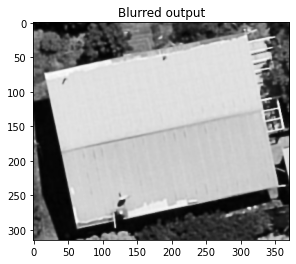

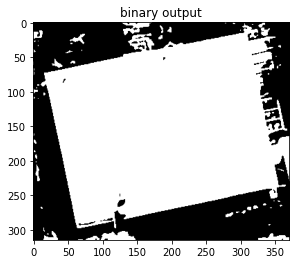

cnt: (800, 1, 2)
maxContours (800, 1, 2)


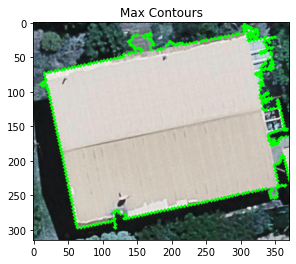

4


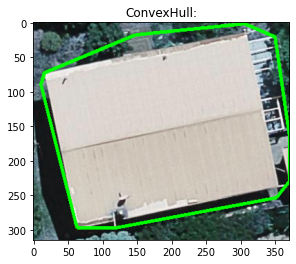

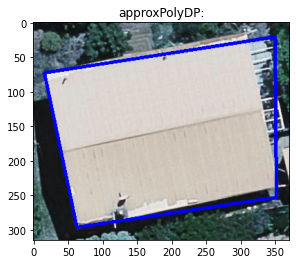

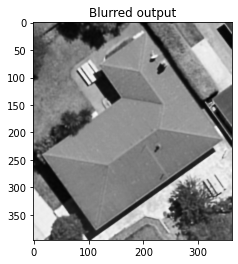

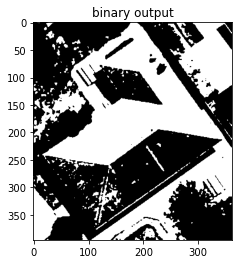

cnt: (1377, 1, 2)


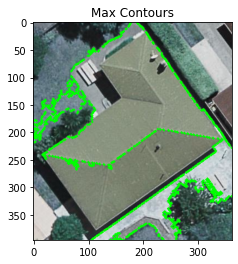

4


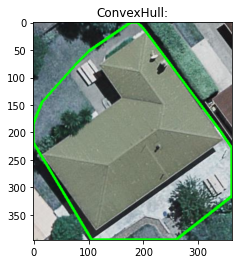

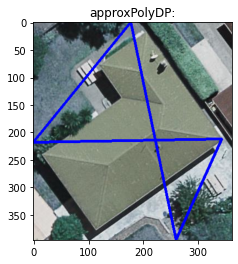

In [243]:
## Blurring 
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred = cv2.bilateralFilter(gray, 5, 75, 75)
plt.title('Blurred output')
plt.imshow(blurred)
plt.show()

# canny = auto_canny(blurred)
# plt.title('Canny output')
# plt.imshow(canny)
# plt.show()

ret, thresh1 = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)
plt.title('binary output')
plt.imshow(thresh1)
plt.show()

# dilated = cv2.dilate(thresh1, np.ones((3,3), dtype=np.uint8))
# plt.title('dilated output')
# plt.imshow(dilated)
# plt.show()


# eroded = cv2.erode(dilated, np.ones((3,3), dtype=np.uint8))
# plt.title('eroded output')
# plt.imshow(eroded)
# plt.show()

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# find the main island (biggest area)
cnt = contours[0]
max_area = cv2.contourArea(cnt)

for cont in contours:
    if cv2.contourArea(cont) > max_area:
        cnt = cont
        max_area = cv2.contourArea(cont)
print('cnt:', cnt.shape)
        
        
maxContour = max(contours, key = cv2.contourArea)
print('maxContours', maxContour.shape)

imgCopy2 = np.copy(img)
cv2.drawContours(imgCopy2, cnt, -1, (0,255,0), 3)
plt.title('Max Contours')
plt.imshow(imgCopy2)
plt.show()

imgCopy3 = np.copy(img)
imgCopy4 = np.copy(img)

# for contour in maxContour:
#     perimeter = cv2.arcLength(contour, True)
#     approximatedShape = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
# #     print(approximatedShape)
#     print(len(approximatedShape))
#     convexHull = cv2.convexHull(contour)
#     cv2.drawContours(imgCopy3, [convexHull], -1, (255, 0, 0), 2)
#     cv2.drawContours(imgCopy4, [approximatedShape], -1, (0, 0, 255), 3)

# define main island contour approx. and hull
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.05*cv2.arcLength(cnt,True)
approximatedShape = cv2.approxPolyDP(cnt,epsilon,True)

print(len(approximatedShape))
convexHull = cv2.convexHull(cnt)

cv2.drawContours(imgCopy3, [convexHull], -1, (0, 255, 0), 3)
cv2.drawContours(imgCopy4, [approximatedShape], -1, (0, 0, 255), 3)

# Display the final convex hull image
plt.title('ConvexHull:')
plt.imshow(imgCopy3)
plt.show()

plt.title('approxPolyDP:')
plt.imshow(imgCopy4)
plt.show()



################################ CASE 2##############################
## Blurring 
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred2 = cv2.bilateralFilter(gray2, 5, 75, 75)
plt.title('Blurred output')
plt.imshow(blurred2)
plt.show()

ret, thresh2 = cv2.threshold(blurred2, 128, 255, cv2.THRESH_BINARY)
plt.title('binary output')
plt.imshow(thresh2)
plt.show()

contours2, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# find the main island (biggest area)
cnt2 = contours2[0]
max_area = cv2.contourArea(cnt2)

for cont2 in contours2:
    if cv2.contourArea(cont2) > max_area:
        cnt2 = cont2
        max_area = cv2.contourArea(cont2)
print('cnt:', cnt2.shape)
        
        
imgCopy22 = np.copy(img2)
cv2.drawContours(imgCopy22, cnt2, -1, (0,255,0), 3)
plt.title('Max Contours')
plt.imshow(imgCopy22)
plt.show()

imgCopy23 = np.copy(img2)
imgCopy24 = np.copy(img2)

# define main island contour approx. and hull
epsilon2 = 0.05*cv2.arcLength(cnt2,True)
approximatedShape2 = cv2.approxPolyDP(cnt2,epsilon2,True)

print(len(approximatedShape2))
convexHull2 = cv2.convexHull(cnt2)

cv2.drawContours(imgCopy23, [convexHull2], -1, (0, 255, 0), 3)
cv2.drawContours(imgCopy24, [approximatedShape2], -1, (0, 0, 255), 3)

# Display the final convex hull image
plt.title('ConvexHull:')
plt.imshow(imgCopy23)
plt.show()

plt.title('approxPolyDP:')
plt.imshow(imgCopy24)
plt.show()

**Conclusion - Active Contours:** <br>
-> It is dependent on 3 hyperparameters to approximate the shape. \
-> Also the **ROI(Region of Interest)** needs to be specified which might not work for our use-case(Considering the fact that whole frame would contain the ROI and the camera may be at different poses causing the hyperparams to change).

**Conclusion - Hough Transform + Polygon Approximation:** <br> 
-> Hough Transform depends on **Hough Threshold**(which specifies the min no. of votes to consider a HOugh line.)\
-> Issues in trying to approximate polygon after Hough Transform. Depends on **n (no. of clusters -> no. of Hough lines extracted)** and **mean intensity threshold**(which might vary on brightness, contrast etc.)

**Conclusion -  Contour Approximation:** <br>
-> Only depends on gray2binary threshold. \
-> The predicted output polygon output varies widely with changes in input(Eg: roof with 4 sides V/S > 4 sides).\
-> If we can properly extract edges of roof, then this algorithm would work considering the lesser amt. of hyperparams.